### IMport library dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
heart_df = pd.read_csv('heart.csv')

In [35]:
heart_df.head()

,Age,Sex,RestingBP,Cholesterol,HeartDisease
0,40,M,140,289,0
1,49,F,160,180,1
2,37,M,130,283,0
3,48,F,138,214,1
4,54,M,150,195,0


In [36]:
heart_df = heart_df.replace('M', 0)
heart_df = heart_df.replace('F', 1)

C:\Users\kongp\AppData\Local\Temp\ipykernel_10620\2489967329.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_df = heart_df.replace('F', 1)


In [37]:
heart_df.head()

,Age,Sex,RestingBP,Cholesterol,HeartDisease
0,40,0,140,289,0
1,49,1,160,180,1
2,37,0,130,283,0
3,48,1,138,214,1
4,54,0,150,195,0


In [38]:
X = heart_df.drop('HeartDisease', axis = 1)
y = heart_df['HeartDisease']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1234)

In [40]:
X_train.shape

(642, 4)

In [41]:
X_test.shape

(276, 4)

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
classifier_rf = RandomForestClassifier(
    random_state = 1234,
    n_jobs = -1,
    max_depth = 5,
    n_estimators = 100,
    oob_score = True
)

In [44]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True,
                       random_state=1234)

In [45]:
classifier_rf.oob_score_

0.705607476635514

### Hyper parameter tuning

In [46]:
rf = RandomForestClassifier(random_state = 1234, n_jobs = -1)

params = {
    'max_depth' : [2,3,5,10,20],
    'min_samples_leaf' : [5,10,20,50,100,200],
    'n_estimators' : [10,25,39,50,100,200]
}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid_search = GridSearchCV(estimator = rf,
                           param_grid = params,
                           cv = 4,
                           n_jobs = -1, verbose = 1, scoring = 'accuracy')

In [49]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 39, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [50]:
grid_search.best_score_

0.7242138975155279

In [51]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_jobs=-1,
                       random_state=1234)

### visualization


[Text(0.4140625, 0.9166666666666666, 'Cholesterol <= 42.5\ngini = 0.49\nsamples = 405\nvalue = [276, 366]\nclass = No Disease'),
 Text(0.1875, 0.75, 'Age <= 62.5\ngini = 0.097\nsamples = 76\nvalue = [6, 111]\nclass = No Disease'),
 Text(0.125, 0.5833333333333334, 'Age <= 51.5\ngini = 0.024\nsamples = 56\nvalue = [1, 82]\nclass = No Disease'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.053\nsamples = 22\nvalue = [1, 36]\nclass = No Disease'),
 Text(0.1875, 0.4166666666666667, 'gini = 0.0\nsamples = 34\nvalue = [0, 46]\nclass = No Disease'),
 Text(0.25, 0.5833333333333334, 'gini = 0.251\nsamples = 20\nvalue = [5, 29]\nclass = No Disease'),
 Text(0.640625, 0.75, 'Sex <= 0.5\ngini = 0.5\nsamples = 329\nvalue = [270, 255]\nclass = Disease'),
 Text(0.46875, 0.5833333333333334, 'Cholesterol <= 280.5\ngini = 0.496\nsamples = 253\nvalue = [190, 226]\nclass = No Disease'),
 Text(0.3125, 0.4166666666666667, 'Cholesterol <= 215.5\ngini = 0.5\nsamples = 203\nvalue = [168, 173]\nclass = No Disease'

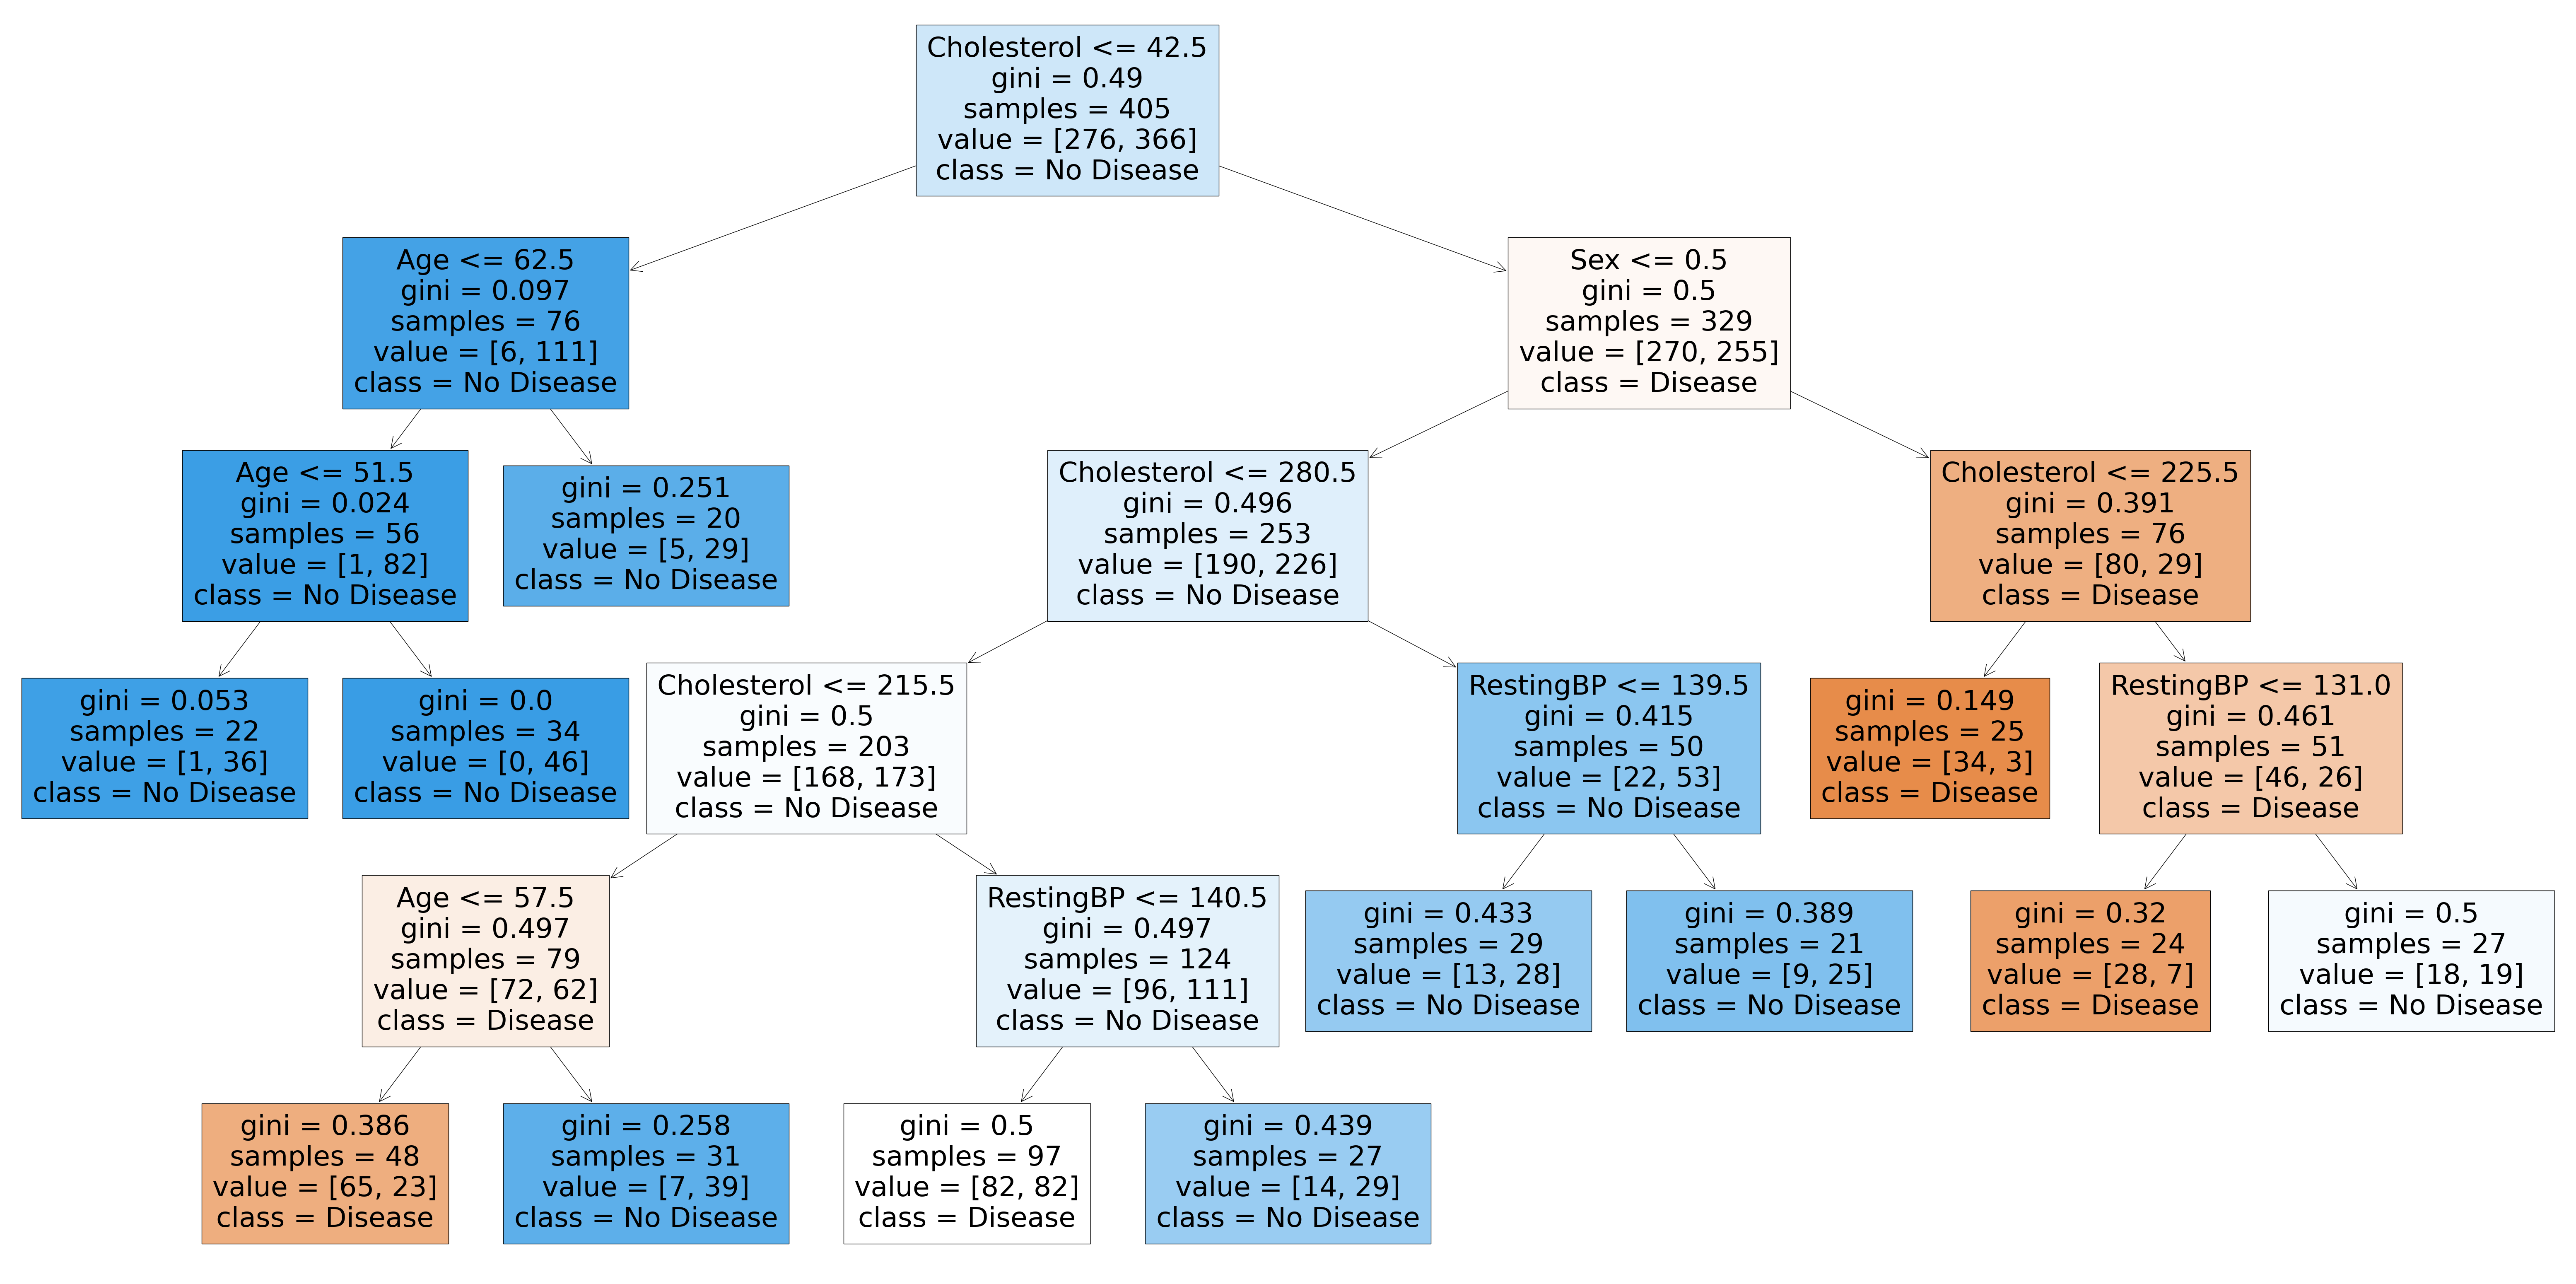

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize = (80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns, class_names = ['Disease', 'No Disease'],filled = True )

In [55]:
rf_best.feature_importances_

array([0.30613891, 0.2235991 , 0.07957973, 0.39068226])

In [56]:
importances_df = pd.DataFrame({
    "Variance Name" : X_train.columns,
    "Importance" : rf_best.feature_importances_
})

In [59]:
importances_df.sort_values(by = "Importance", ascending = False)

,Variance Name,Importance
3,Cholesterol,0.390682
0,Age,0.306139
1,Sex,0.223599
2,RestingBP,0.079580
